In [22]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math

Mains supply voltage:
$$v_o(t) = V_m . sin(\omega t)$$


## Resistive Load

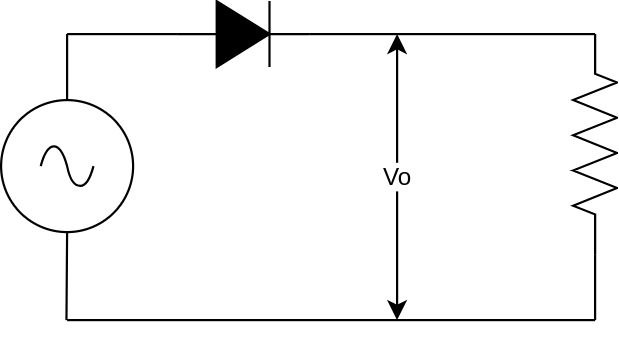

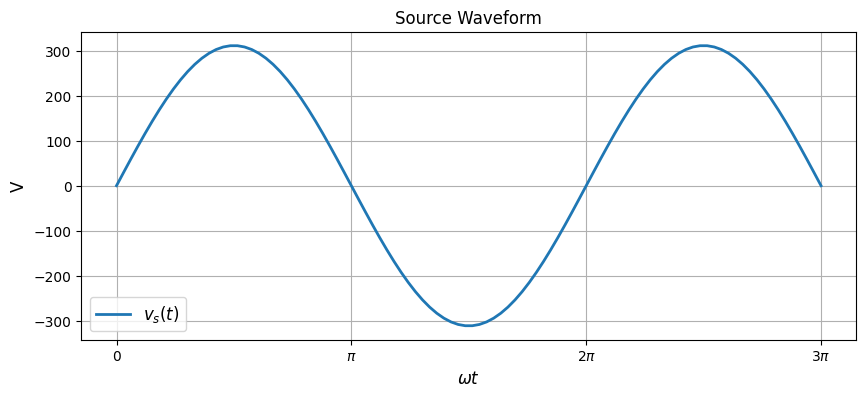

In [23]:
wt = np.linspace(0, 3*np.pi, 100)
Vm_num = 220*np.sqrt(2)
vs = Vm_num*np.sin(wt)

plt.figure(figsize=(10,4))
plt.plot(wt, vs, '-', lw = 2, label='$v_s(t)$')
plt.title('Source Waveform')
pi_vals = [0, np.pi, 2 * np.pi, 3 * np.pi]
pi_labels = [r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$']
plt.xticks(pi_vals, pi_labels)

plt.xlabel('$\omega t$', fontsize=12)
plt.ylabel('V', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()

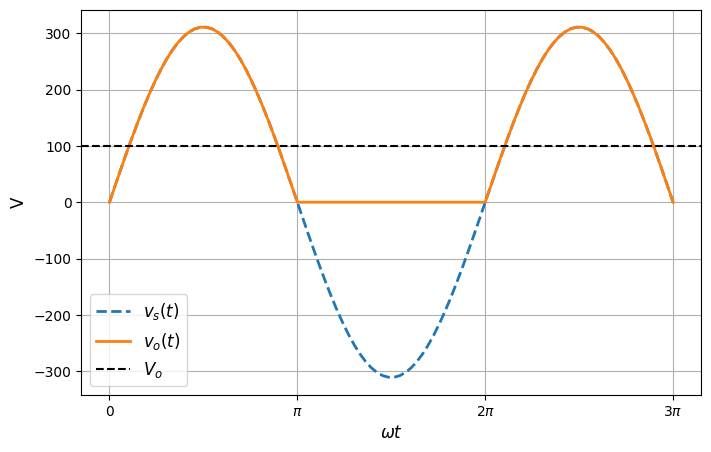

In [24]:
plt.figure(figsize=(8,5))
plt.plot(wt, vs, '--', lw = 2, label='$v_s(t)$')

vo = vs
vo[vo < 0] = 0
plt.plot(wt, vo, lw = 2, label='$v_o(t)$')

plt.axhline(99, color='black', label='$V_o$', linewidth=1.5, linestyle='--') 

pi_vals = [0, np.pi, 2 * np.pi, 3 * np.pi]
pi_labels = [r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$']
plt.xticks(pi_vals, pi_labels)

plt.xlabel('$\omega t$', fontsize=12)
plt.ylabel('V', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()

In [25]:
Vo, Vo_rms, Vm, omega_t = sp.symbols('Vo Vo_rms Vm omega_t', real=True, positive=True)

vo = Vm * sp.sin(omega_t)

# Average value:

int = (1 / (2 * sp.pi)) * sp.integrate(vo, (omega_t, 0, sp.pi))
# result = sp.simplify(int)
eq = sp.Eq(Vo, int)
print('Average value:')
display(eq)

# RMS value:

int = sp.sqrt( (1 / (2 * sp.pi)) * sp.integrate(vo**2, (omega_t, 0, sp.pi)) )
result = sp.simplify(int)
eq = sp.Eq(Vo_rms, int)
print('RMS value:')
display(eq)


Average value:


Eq(Vo, Vm/pi)

RMS value:


Eq(Vo_rms, Vm/2)

## Resistive-Inductive Load

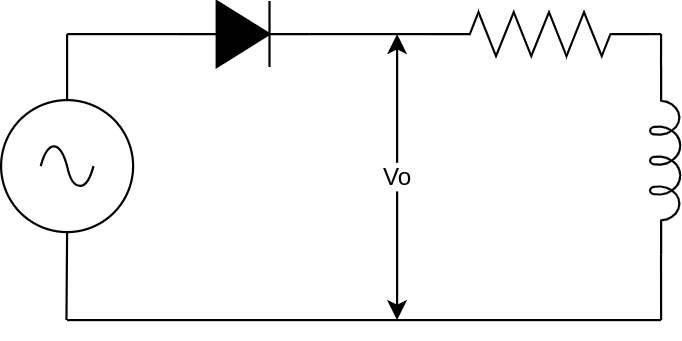

In [26]:
beta = sp.symbols('beta', real=True)

# Average value:

int = (1 / (2 * sp.pi)) * sp.integrate(vo, (omega_t, 0, beta))
result = sp.simplify(int)
eq = sp.Eq(Vo, result)
print('Average value:')
display(eq)

# RMS value:

int = sp.sqrt( (1 / (2 * sp.pi)) * sp.integrate(vo**2, (omega_t, 0, beta)) )
result = sp.simplify(int)
eq = sp.Eq(Vo_rms, result)
print('RMS value:')
display(eq)


Average value:


Eq(Vo, Vm*(1 - cos(beta))/(2*pi))

RMS value:


Eq(Vo_rms, Vm*sqrt(beta - sin(2*beta)/2)/(2*sqrt(pi)))

### Current analysis
$$i_o(\omega t) = \frac{V_m}{|Z|}(sin(\omega t - \phi) + sin(\phi)\exp(\frac{-R}{L \omega}\omega t)), 0<\omega t<\beta$$ 
with
$$|Z| = \sqrt{R^2 + L^2}$$
and
$$\phi = \arctan(\frac{\omega L}{R})$$
for
$$i_o(\beta)=0$$

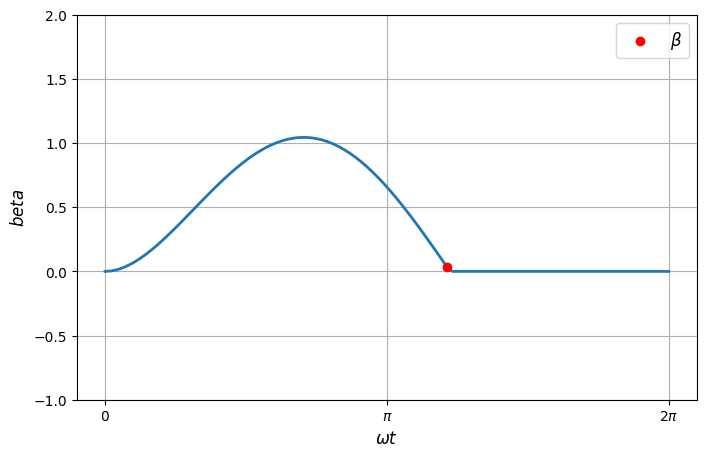

<IPython.core.display.Math object>

In [27]:
# Determining the Angle of Extinction
# values to exemplify
x = np.linspace(0, 2*np.pi, 100)
r_num = 45
l_num  = 100e-3
w_num  = 2*np.pi*60
phi_num  = np.arctan(w_num*l_num/r_num)

i_beta = np.sin(x - phi_num ) + np.sin(phi_num )*np.exp(-(r_num /(l_num *w_num ))*x)
zero_crossings = np.where(np.diff(np.sign(i_beta)))[0]  
x_zeros = x[zero_crossings]
i_zeros = i_beta[zero_crossings]

i_beta[i_beta<0] = 0

plt.figure(figsize=(8,5))
plt.plot(x, i_beta, lw = 2)
plt.scatter(x_zeros[1], i_zeros[1], color='red', zorder=2, label=r'$\beta$')


pi_vals = [0, np.pi, 2 * np.pi]
pi_labels = [r'$0$', r'$\pi$', r'$2\pi$']
plt.xticks(pi_vals, pi_labels)

plt.xlabel('$\omega t$', fontsize=12)
plt.ylabel('$beta$', fontsize=12)
plt.ylim(-1, 2)
plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()

ext = r'\text{Angle of extinction } \beta:' + f"{x_zeros[1]:.2f}" + r'\text{rad  or }' +  f'{(x_zeros[1]*180/np.pi):.2f}' + '°'

display(Math(ext))

beta_num = x_zeros[1]
# print("zero crossings (x, y):")
# for i, (x0, y0) in enumerate(zip(x_zeros, i_zeros)):
#     print(f"{i+1}: x = {x0:.4f}, y = {y0:.4e}")

In [28]:
# Average and effective current value
io, phi, Io, Io_rms = sp.symbols('i_o phi Io Io_rms', real=True)
Z, R, L, omega = sp.symbols('Z R L omega', real=True, positive=True)

io = (Vm/Z)*(sp.sin(omega_t - phi) + sp.sin(phi)*sp.exp(-(R/(L*omega))*omega_t))

int = (1/(2*sp.pi)) * sp.integrate(io, (omega_t, 0, beta))
eq_avg = sp.Eq(Io, int)

print('Avarage value:')
display(eq_avg)

int = sp.sqrt((1/(2*sp.pi)) * sp.integrate(io**2, (omega_t, 0, beta)))
eq_rms = sp.Eq(Io_rms, int)
print('RMS value:')
display(eq_rms)

Avarage value:


Eq(Io, (-Vm*(-L*omega*sin(phi)/R - cos(phi))/Z + Vm*(-L*omega*exp(-R*beta/(L*omega))*sin(phi)/R - cos(beta - phi))/Z)/(2*pi))

RMS value:


Eq(Io_rms, sqrt(2)*sqrt(-Vm**2*(-L**3*omega**3*sin(phi)**2/(2*L**2*R*omega**2 + 2*R**3) - 3*L**2*R*omega**2*sin(phi)*cos(phi)/(2*L**2*R*omega**2 + 2*R**3) + 3*L*R**2*omega*sin(phi)**2/(2*L**2*R*omega**2 + 2*R**3) + R**3*sin(phi)*cos(phi)/(2*L**2*R*omega**2 + 2*R**3))/Z**2 + Vm**2*(-L**3*omega**3*sin(phi)**2/(2*L**2*R*omega**2*exp(2*R*beta/(L*omega)) + 2*R**3*exp(2*R*beta/(L*omega))) + L**2*R*beta*omega**2*exp(2*R*beta/(L*omega))*sin(beta - phi)**2/(2*L**2*R*omega**2*exp(2*R*beta/(L*omega)) + 2*R**3*exp(2*R*beta/(L*omega))) + L**2*R*beta*omega**2*exp(2*R*beta/(L*omega))*cos(beta - phi)**2/(2*L**2*R*omega**2*exp(2*R*beta/(L*omega)) + 2*R**3*exp(2*R*beta/(L*omega))) - L**2*R*omega**2*exp(2*R*beta/(L*omega))*sin(beta - phi)*cos(beta - phi)/(2*L**2*R*omega**2*exp(2*R*beta/(L*omega)) + 2*R**3*exp(2*R*beta/(L*omega))) - 4*L**2*R*omega**2*exp(R*beta/(L*omega))*sin(phi)*cos(beta - phi)/(2*L**2*R*omega**2*exp(2*R*beta/(L*omega)) + 2*R**3*exp(2*R*beta/(L*omega))) - 4*L*R**2*omega*exp(R*beta/(L*om

In [29]:
# values to exemplify
z_num = np.sqrt(r_num**2 + l_num**2)

Io_num = eq_avg.rhs
Irms_num = eq_rms.rhs

Io_num  = sp.lambdify((Vm, Z, R, L, omega, phi, beta), Io_num, modules=['numpy'])
Io_num = Io_num(Vm_num, z_num, r_num, l_num, w_num, phi_num, beta_num)

print(f'Avarage value: {Io_num}')

Irms_num  = sp.lambdify((Vm, Z, R, L, omega, phi, beta), Irms_num, modules=['numpy'])
Irms_num = Irms_num(Vm_num, z_num, r_num, l_num, w_num, phi_num, beta_num)

print(f'RMS value: {Irms_num}')

Avarage value: 2.5290734392186414
RMS value: 3.7531141350654385


Differential equation of the circuit:


Eq(L*Derivative(i(t), t) + R*i(t), Vm*sin(omega*t))

ODE Solution:


Eq(i(t), -L*Vm*omega*cos(omega*t)/(L**2*omega**2 + R**2) + L*Vm*omega*exp(-R*t/L)/(L**2*omega**2 + R**2) + R*Vm*sin(omega*t)/(L**2*omega**2 + R**2))

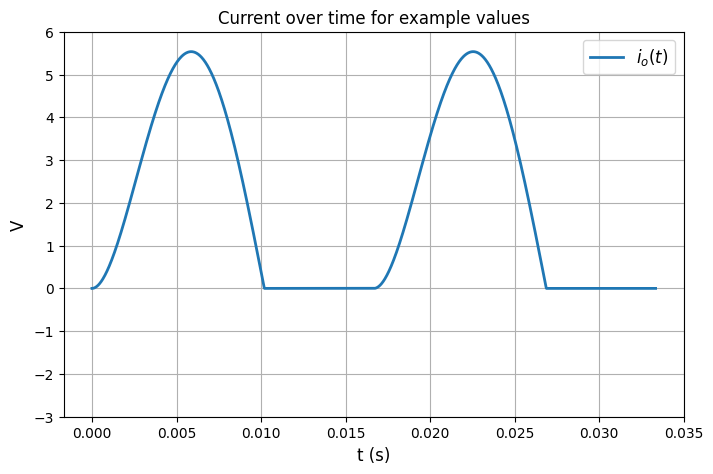

In [30]:
t = sp.symbols('t', real=True, positive=True)
i = sp.Function('i')(t)

pvi = {i.subs(t, 0): 0}

eq = sp.Eq(L*i.diff(t) + R*i, Vm*sp.sin(omega*t))
print('Differential equation of the circuit:')
display(eq)
func = sp.dsolve(eq, ics=pvi)
print('ODE Solution:')
display(func)

func_num = func.rhs

func_num  = sp.lambdify((t, R, L, omega, Vm), func_num, 'numpy')

T = 2*np.pi / w_num
t_num = np.linspace(0, T, 1000)

i_num = func_num(t_num, r_num, l_num, w_num, Vm_num)
i_num[i_num<0] = 0
repeat = 2
i_num = np.tile(i_num, repeat)
t_num = np.linspace(0, T*repeat, len(i_num))

plt.figure(figsize=(8,5))
plt.plot(t_num, i_num, lw = 2, label='$i_o(t)$')

plt.title('Current over time for example values')
plt.xlabel('t (s)', fontsize=12)
plt.ylabel('V', fontsize=12)
plt.ylim(-3, 6)
plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()


## Resistive-inductive-source load

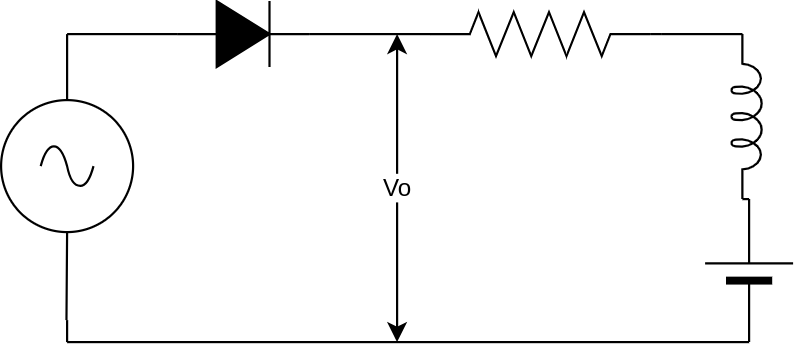

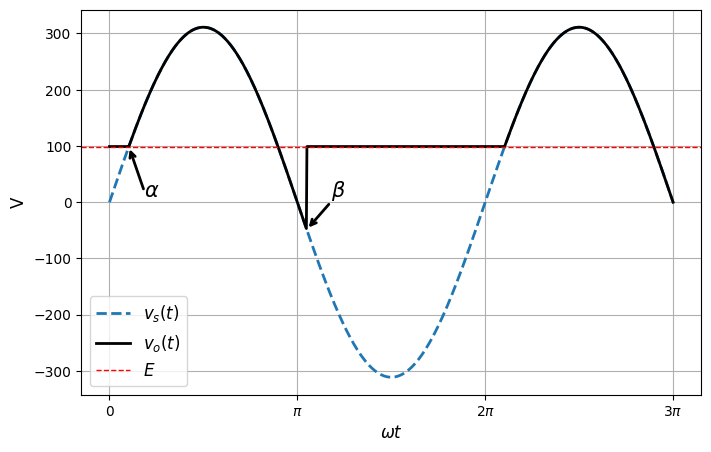

In [71]:
# Parameters
E = 99
wt = np.linspace(0, 3 * np.pi, 1000) 

# Angle Setting
alpha = np.arcsin(E / Vm_num)
beta = np.pi * 1.05

# Function to limit voltage
def vo_function(wt, Vm_num, E, alpha, beta):
    vo = Vm_num * np.sin(wt)
    vo[(wt >= 0) & (wt < alpha)] = np.maximum(vo[(wt >= 0) & (wt < alpha)], E)
    vo[(wt >= beta) & (wt < alpha + 2 * np.pi)] = np.maximum(vo[(wt >= beta) & (wt < alpha + 2 * np.pi)], E)
    vo[(wt >= alpha + 2 * np.pi) & (wt <= beta + 2 * np.pi)] = Vm_num * np.sin(wt[(wt >= alpha + 2 * np.pi) & (wt <= beta + 2 * np.pi)])
    return vo

vs = Vm_num * np.sin(wt)  # Original wave
vo = vo_function(wt, Vm_num, E, alpha, beta)  # Modified wave

# Plot
plt.figure(figsize=(8, 5))
plt.plot(wt, vs, '--', lw=2, label='$v_s(t)$')  
plt.plot(wt, vo, lw=2, color='black', label='$v_o(t)$')  
plt.axhline(E, color='red', linestyle='--', linewidth=1, label='$E$') 

plt.text(alpha+0.25, E-90, r'$\alpha$', fontsize=15, color='black')
plt.text(beta+0.4, 10, r'$\beta$', fontsize=15, color='black')

plt.annotate('', xy=(alpha, E), xytext=(alpha+0.26, E-80), 
             arrowprops=dict(arrowstyle='->', lw=2, color='black'))

plt.annotate('', xy=(beta, Vm_num * np.sin(beta)), xytext=(beta+0.4, 0), 
             arrowprops=dict(arrowstyle='->', lw=2, color='black'))

pi_vals = [0, np.pi, 2 * np.pi, 3 * np.pi]
pi_labels = [r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$']
plt.xticks(pi_vals, pi_labels)
plt.xlabel('$\omega t$', fontsize=12)
plt.ylabel('V', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()
